In [10]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [11]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


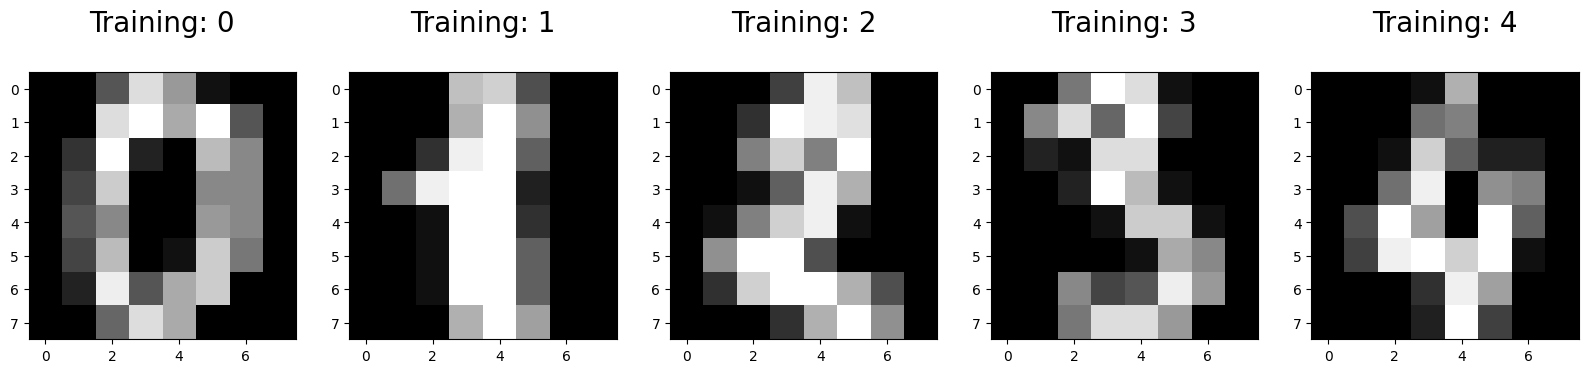

In [12]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [13]:
#Split the data into train and test set
X = digits.data.reshape(-1, 8, 8)
y = digits.target

In [14]:
X.shape

(1797, 8, 8)

In [15]:
y.shape

(1797,)

In [16]:
#Preprocess the image
from skimage import exposure

X_preprocessed = []
for image in X:
    #Apply contrast stretching, very important
    p2, p98 = np.percentile(image, (2, 98))
    image_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))

    #Flatten the processed image 
    img_flat = image_rescale.flatten()

    X_preprocessed.append(img_flat)

In [17]:
X_preprocessed = np.array(X_preprocessed)

In [18]:
#SPlitting the data into train and testing datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=14)

#The train set is use to train the model an the test set will be used to make predictions



In [19]:
#Build and fit the Rando forest model

#1st import the relevant libraries from sci-fit learn
from sklearn.ensemble import RandomForestClassifier

#Build the model
rf = RandomForestClassifier(random_state=14)


#Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=14)

In [20]:
#Make predictions on the test set
y_pred = rf.predict(X_test)

In [28]:
#Evaluate the Random Forest Classifier Performance

from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


Text(0.5, 1.0, 'Test Random Forest Confusion Matrix')

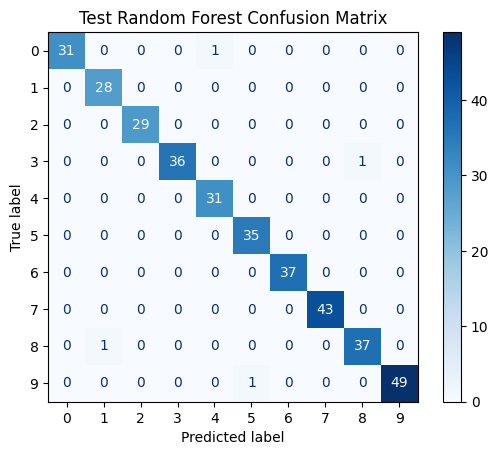

In [32]:
#Print the Confusion Matrix for the Random Forest
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="Blues")
plt.title('Test Random Forest Confusion Matrix')

In [22]:
#Now lets perform hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20]
}

#Build the GridSearch Model
grid_search = GridSearchCV(rf, param_grid, cv=5)

#Fit the GridSearch Model
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=14),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 300, 500]})

In [23]:
#Train the Classfier with best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=500, random_state=14)

In [24]:
#Make predictions using the best classifier
y_pred_best = best_rf.predict(X_test)

In [29]:
#Evaluate the performance of the best classifier
accuracy_best = accuracy_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best, average='macro')
precision_best = precision_score(y_test, y_pred_best, average='macro')
f1_best = f1_score(y_test, y_pred_best, average='macro')

In [30]:
#SHow the metrics of the best Random Forest Classifier after GridSearchCV
print('The Testing Accuracy of the best Random Forest Classifier: ', accuracy_best)
print('The Recall Score of the best Random Forest Classifier: ', recall_best)
print('The Precision Score of the best Random Forest Classifier: ', precision_best)
print('The F1 Score of the best Random Forest Classifier: ', f1_best)

The Testing Accuracy of the best Random Forest Classifier:  0.9861111111111112
The Recall Score of the best Random Forest Classifier:  0.9872151369545801
The Precision Score of the best Random Forest Classifier:  0.9855958163070232
The F1 Score of the best Random Forest Classifier:  0.9862856326633416


In [31]:
#SHow the metrics of the Base Random Forest Classifier 
print('The Testing Accuracy of the Random Forest Classifier: ', accuracy)
print('The Recall Score of the Random Forest Classifier: ', recall)
print('The Precision Score of the Random Forest Classifier: ', precision)
print('The F1 Score of the Random Forest Classifier: ', f1)

The Testing Accuracy of the Random Forest Classifier:  0.9888888888888889
The Recall Score of the Random Forest Classifier:  0.989540718349929
The Precision Score of the Random Forest Classifier:  0.9880173674127848
The F1 Score of the Random Forest Classifier:  0.988651017185091


Text(0.5, 1.0, 'Test Random Forest Confusion Matrix')

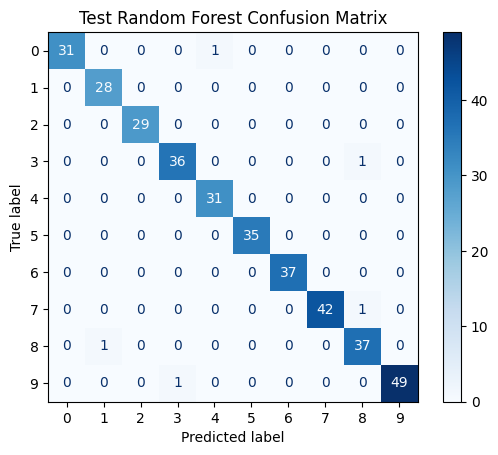

In [33]:

#Print the Confusion Matrix for the Best Random Forest Classfier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred_best, labels=best_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="Blues")
plt.title('Test Random Forest Confusion Matrix')